# SIMPLE LINEAR REGRESSION



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_error

STEP 2:
    IMPORT DATASET

In [11]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values
true_salaries

array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

In [9]:
# Adding some random noise to salaries to reduce accuracy

noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)

Y = true_salaries + noise  # Final dependent variable with noise
Y

array([27.68291154, 32.67135123, 41.20981136, 35.43359878, 41.37541084,
       52.18856235, 54.9358444 , 66.57123666, 65.45987962, 67.93848149])

In [23]:
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [41]:
c = model.intercept_

m = model.coef_[0]
 
print(f"Intercept: {c}")
print(f"Coefficients: {m}")

Intercept: 22.281814051916896
Coefficients: 4.77543541366746


In [43]:
# Step 6: Display the equation of the line  
print(f"Equation of the line: Y = {m:.2f}X + {c:.2f}")  

# Step 7: Predict values using the model  
y_pred = model.predict(X)# Predict salaries for the given experience values 
y_pred

Equation of the line: Y = 4.78X + 22.28


array([27.05724947, 31.83268488, 36.60812029, 41.38355571, 46.15899112,
       50.93442653, 55.70986195, 60.48529736, 65.26073277, 70.03616819])

In [44]:
# 1. Mean Squared Error (MSE) - Measures average squared difference between actual and predicted values  
mse = mean_squared_error(Y, y_pred)  
print(f"Mean Squared Error (MSE): {mse:.2f}")  

Mean Squared Error (MSE): 12.42


In [45]:
# 2. Mean Absolute Error (MAE) - Measures average absolute difference between actual and predicted values  
mae = mean_absolute_error(Y, y_pred)  
print(f"Mean Absolute Error (MAE): {mae:.2f}")  


# 3. Root Mean Squared Error (RMSE) - Measures standard deviation of residuals (errors)  
rmse = np.sqrt(mse)  
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")  


Mean Absolute Error (MAE): 2.72
Root Mean Squared Error (RMSE): 3.52


using using mse and mae we are able to calculate error 


In [47]:
# 4. R-squared (R²) - Represents how well the model fits the data (0 to 1, where 1 is best)  
r2 = r2_score(Y, y_pred)  
print(f"R-squared (R²): {r2:.2f}")  

R-squared (R²): 0.94


In [48]:
# 5. Adjusted R-squared (R²_adj) - Adjusted for the number of predictors, better for multiple regression  
n = len(Y)  # Number of observations  
p = 1       # Number of independent variables (Experience)  

adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  
print(f"Adjusted R-squared: {adj_r2:.2f}")  

Adjusted R-squared: 0.93


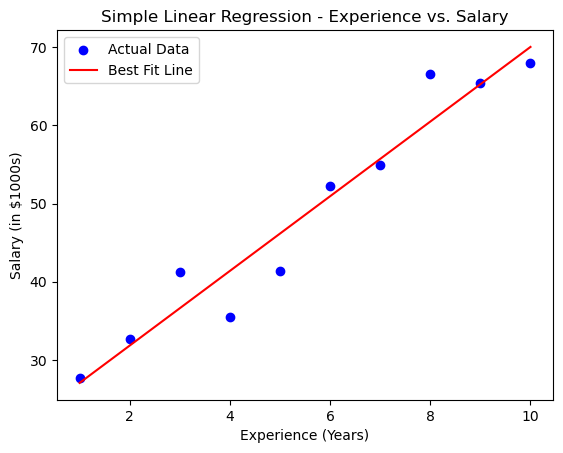

In [50]:
# Step 8: Plot the actual data points  
plt.scatter(X, Y, color='blue', label='Actual Data')  # Scatter plot of actual values  

# Step 9: Plot the Regression Line (Best Fit Line)  
plt.plot(X, y_pred, color='red', label='Best Fit Line')  # Regression line  

# Step 10: Add Labels and Legend  
plt.xlabel('Experience (Years)')  # Label for X-axis  
plt.ylabel('Salary (in $1000s)')  # Label for Y-axis  
plt.title('Simple Linear Regression - Experience vs. Salary')  # Title of the plot  
plt.legend()  # Show legend  

# Step 11: Display the graph  
plt.show()  # Show the final plotted graph  

In [51]:
# User can input experience, and the model will predict salary  
while True:  
    try:  
        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit): "))  
        if exp == -1:  
            break  # Exit the Loop  
        predicted_salary = model.predict(np.array([[exp]]))[0]  
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}K")  
    except ValueError:  
        print("Please enter a valid number!")  


Enter years of experience to predict salary (or -1 to exit): 13000
Predicted Salary for 13000.0 years of experience: $62102.94K

Enter years of experience to predict salary (or -1 to exit): 3
Predicted Salary for 3.0 years of experience: $36.61K

Enter years of experience to predict salary (or -1 to exit): -1


**Step 1: Import necessary libraries**
    
**Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)**
    
**Step 3: Creating a Linear Regression Model**
    
**Step 4: Training the model using data set**
    
**Step 5: Get the values of slope and intercept from the trained model**
    
**Step 6: Display the equation of the line**
    
**Step 7: Predit values using the model**
    
**Step 8: Plot the regression line**
    
**step 9: Prediction Features**
 

In [56]:
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
import statsmodels.api as sm  # For OLS Regression

# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     54.01
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           5.56e-05
Time:                        12:16:15   Log-Likelihood:                -26.699
No. Observations:                  10   AIC:                             59.40
Df Residuals:                       7   BIC:                             60.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6856     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
# Create a simple dataset
data = {
    'Size': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200],
    'Bedrooms': [3, 3, 3, 4, 4, 4, 5, 5],
    'Age': [10, 15, 10, 20, 30, 15, 20, 25],
    'Price': [300000, 320000, 340000, 360000, 400000, 370000, 420000, 430000]
}
 
# Convert to DataFrame
df = pd.DataFrame(data)
 
# Define independent variables (features) and dependent variable (target)
# X = df[['Size', 'Bedrooms', 'Age']]  #  3 Independent variables
# y = df['Price']  # Dependent variable
 
# X = df[['Size', 'Bedrooms']]  #  2 Independent variables
# y = df['Price']  # Dependent variable
 
X = df[['Size']]  #  1 Independent variables
y = df['Price']  # Dependent variable
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Create a linear regression model
model = LinearRegression()
 
# Train the model
model.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred = model.predict(X_test)
 
# Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Evaluate the model 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("Mean Squared Error:", mse)
print("R-squared:", r2)
 
 
new_house = np.array([[1500]])
predicted_price = model.predict(new_house)
print(f"Predicted Price for new house: {predicted_price[0]}")

Intercept: 16600.00000000006
Coefficients: [192.]
Mean Squared Error: 475400000.0
R-squared: 0.23936000000000002
Predicted Price for new house: 304600.0


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
df=pd.read_csv("wine.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [61]:
# Select multiple independent variables (you can add more columns here)
X = df[['Alcohol', 'Phenols', 'Proanth']]  # 3 Independent variables
y = df['Ash']  # Dependent variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predicting for a new house with multiple features (example input)
wine_quality = np.array([[1500, 0.5, 0.3]])  # Example with values for 'Alcohol', 'Feature1', 'Feature2'
predicted_price = model.predict(wine_quality)
print(f"Predicted wine quality: {predicted_price[0]}")

Intercept: 1.4819828928998071
Coefficients: [ 0.06391754  0.06010323 -0.05491837]
Mean Squared Error: 0.0614390539047691
R-squared: 0.041078401409259446
Predicted Price for new house: 97.37186287236312


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
